In [61]:
import pandas as pd
pd.set_option('display.max_colwidth', 250)
pd.set_option('max_rows', 2500)
from wordcloud import WordCloud
import matplotlib.pylab as plt
import matplotlib.dates as mdates
from datetime import datetime
start_time0 = datetime.now()
import spacy
import numpy as np
import os
import re
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import xgboost as xgb
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import FrenchStemmer
from nltk import NaiveBayesClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [62]:
stopwords=['reformedesretraites','réformedesretraites','retraiter','grevegenerale','reformedesretraites']

In [63]:
greve_twitter_origin=pd.read_csv('greve_twitter_final.csv', index_col=[0])
#greve_twitter_origin[1625:2000]

In [64]:
greve_twitter_origin.tweet_processed2=[x.replace("""'""",'') for x in greve_twitter_origin.tweet_processed2]
greve_twitter_origin.date = greve_twitter_origin.date.map(lambda x: str(x)[:-15])

In [65]:
#greve_twitter[900:1000]

In [66]:
index_neg=[31,33,44,46,55,59,61,74,78,108,119,121,130,136,141,149,154,162,168,175,180,186,
           187,188,193,199,219,220,240,267,274,276,279,284,289,292,303,312,323,328,330,339,341,
           346,347,348,349,361,363,396,403,404,417,440,441,442,447,451,462,465,466,477,487,488,
           491,493,496,497,2,20,24,25,28,504,516,521,525,532,536,540,544,545,552,554,557,558,
           563,576,579,585,591,592,595,599,602,634,658,659,660,661,675,681,685,688,690,699,709,
          711,715,722,723,733,736,746,747,753,756,762,763,764,766,783,788,798,801,803,805,810,
           813,816,826,827,828,829,831,839,850,854,856,861,878,889,890,893,900,902,906,908,910,
           916,929,930,937,940,953,956,958,966,970,973,976,982,988,997,998,1001,1003,1006,1007,
           1008,1010,1011,1030,1031,1026,1034,1036,1037,1038,1039,1040,1042,1047,1049,1051,1053,
          1056,1057,1058,1060,1063,1064,1065,1067,1068,1069,1072,1074,1077,1081,1083,1084,1087,
          1091,1096,1097,1098,1100,1103,1108,1109,1116,117,1125,1145,1153,1154,1156,1158,1161,
          1169,1175,1178,1180,1192,1193,1203,1205,1207,1208,1210,1214,1237,1262,1264,1266,1279,
          1280,1282,1290,1293,1298,1305,1314,1316,1343,1345,1350,1351,1352,1353,1354,1356,1357,
           1361,1368,1374,1375,1377,1379,1380,1389,1396,1398,1400,1404,1407,1408,1410,1415,1421,
           1423,1424,1427,1430,1431,1433,1434,1437,1441,1442,1445,1453,1458,1468,1474,1485,1486,
           1493,1494,1495,1500,1501,1507,1509,1512,1517,1522,1527,1528,1530,1543,1544,1550,1553,
          1564,1565,1568,1569,1570,1574,1576,1583,1584,1597,1598,1600,1601,1606,1612,1617,1621,
          1623,1626,1626,1628,1630,1631,1634,1637,1645,1648,1650,1657,1664,1648,1650,1657,1664,
          1666,1669,1672,1673,1674,1682,1683,1690,1694,1696,1698,1700,1701,1702,1704,1705,1706,
          1707,1708,1710,1716,1717,1721,1732,1733,1736,1739,1748,1758,1776,1778,1782,1784,1785,
          1794, 1797,1799,1814,1826,1832,1835,1838,1839,1840,1842,1846,1849,1854,1856,1882,1883,
           1887,1901,1906,1907,1914,1917,1918,1923,1924,1928,1932,1935,1936,1942,1944,1947,1953,
          1954,1955,1960,1961,1967,1968,1972,1975,1983,1984,1987,1990,1992,1997]
index_pos=[14,22,56,79,122,163,195,237,242,253,400,407,408,410,434,435,439,443,457,459,479,
          528,569,617,666,741,755,855,919,942,974,975,1027,1055,1167,1179,1465,1513,1520,1614,
          1817,1818,1819,1820]
greve_twitter_origin['polarity'].iloc[index_neg] = 'negatif'
greve_twitter_origin['polarity'].iloc[index_pos] = 'positif'


In [67]:
greve_twitter_origin['polarity'][292]

'negatif'

In [152]:
greve_twitter_train = greve_twitter_origin[0:2000]
greve_twitter_train['polarity'].value_counts()

negatif    1383
positif     617
Name: polarity, dtype: int64

In [153]:
from sklearn.utils import resample

In [154]:
df_majority = greve_twitter_train[greve_twitter_train.polarity=='negatif']
df_minority = greve_twitter_train[greve_twitter_train.polarity=='positif']
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=1383,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
greve_twitter_train = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
greve_twitter_train.polarity.value_counts()

negatif    1383
positif    1383
Name: polarity, dtype: int64

In [155]:
count_vectorizer = CountVectorizer(analyzer='word') 
cv = count_vectorizer.fit(greve_twitter_train['tweet_processed2'])
pickle.dump(cv, open("cv1.pkl", "wb"))
cv_ = count_vectorizer.fit_transform(greve_twitter_train['tweet_processed2'])
cv1 = pickle.load(open("cv1.pkl", 'rb'))
cv1_new = CountVectorizer(vocabulary = cv1.vocabulary_)

In [156]:
X_train_logreg,X_test_logreg,y_train_logreg,y_test_logreg = train_test_split(cv_,
                                                greve_twitter_train['polarity'] , test_size=.2,
                                                 random_state=42)

In [157]:
logreg = LogisticRegression(C=1,penalty="l2")
logreg.fit(X_train_logreg,y_train_logreg)
prediction_logreg = logreg.predict(X_test_logreg)
print(classification_report(prediction_logreg,y_test_logreg))

              precision    recall  f1-score   support

     negatif       0.80      0.94      0.86       243
     positif       0.95      0.81      0.88       311

   micro avg       0.87      0.87      0.87       554
   macro avg       0.87      0.88      0.87       554
weighted avg       0.88      0.87      0.87       554



In [158]:
greve_twitter=pd.read_csv('greve_twitter_final.csv', index_col=[0])
X_cv2 = cv1_new.transform(greve_twitter['tweet_processed2'])
greve_twitter['polarity2']=logreg.predict(X_cv2)

In [159]:
accuracy_score(greve_twitter['polarity'],greve_twitter['polarity2'])
greve_twitter.loc[greve_twitter['polarity2']=='positif'].drop(columns=['tweet_processed','tweet_processed2','polarity'])
#greve_twitter.loc[greve_twitter['polarity']!=greve_twitter['polarity2']].drop(columns=['tweet_processed','tweet_processed2'])

,date,tweet,polarity2
6,2019-12-30 23:14:53+00:00,"Article de @Nice_Matin [2/2] ""Emmanuel Macron devrait réaffirmer lors de ses voeux aux Français ""l'ambition forte du #gouvernement"" et la sienne pour la #RéformeDesRetraites, un ""projet de progrès social qui corrige de nombreuses inégalités"", a ...",positif
7,2019-12-30 23:14:52+00:00,"Article de @Nice_Matin [Thread 1/2] @EmmanuelMacron devrait réaffirmer son ""ambition forte"" pour la #RéformeDesRetraites 30/12/2019",positif
9,2019-12-30 23:12:51+00:00,C'est très instructif pour mettre en perspective les mouvements sociaux de notre époque! #GreveGenerale #reformedesretraites,positif
10,2019-12-30 23:12:25+00:00,Non c’est légitime #reformedesretraites,positif
14,2019-12-30 22:48:34+00:00,Arrêtons de parler de grève contre la réforme des retraites. Il ne s’agit que de la grève contre la réforme des régimes spéciaux de la #RATP et de la #SNCF. Rien de plus. #ReformedesRetraites,positif
19,2019-12-30 22:34:19+00:00,"Une réforme de justice sociale, tout ça quoi... #greve31decembre #Retraites #reformedesretraites",positif
21,2019-12-30 22:28:44+00:00,@pm_cheung @Ernesto52944864 #GiletsJaunes #reformedesretraites @pablo_rotelli,positif
22,2019-12-30 22:07:39+00:00,"@AnasseKazib , pas vraiment ma tasse de thé mais force est de constater qu'il tient bien sa place dans la #reformedesretraites , qu'il maîtrise son sujet, qu'il défend le morceau et qu'il est plutôt bon pour déstabiliser l'intelligentsia macronis...",positif
23,2019-12-30 22:06:11+00:00,"Les syndicats les plus anti-#RéformeDesRetraites rivalisent de #FakeNews pour la lier au principe de capitalisation alors qu'elle consolide celui de répartition. Mais en plus ce sont eux, tel #FO, qui gèrent le plus gros régime par capitalisatº. ...",positif
25,2019-12-30 22:02:25+00:00,"Leur #reformedesretraites , c’est non! Tout le monde est concerné!",positif


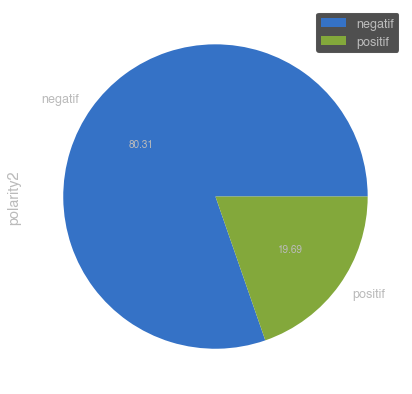

In [147]:
greve_twitter.polarity2.value_counts().plot.pie(figsize=(7,7), autopct='%.2f')
plt.legend()
plt.savefig('greve_pie.png')
plt.show()


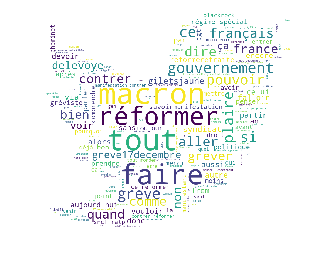

In [50]:
import numpy as np
from PIL import Image
twitter_mask = np.array(Image.open("./twitter_mask.png")) 
stopwords=['reformedesretraites','réformedesretraites','retraiter','grevegenerale']
all_text= ' '.join([x for x in greve_twitter.tweet_processed2])
wordcloud = WordCloud(background_color='white',random_state=21,
                      max_font_size=110,width=1800,
                      height=1400,
                      stopwords=stopwords,mask=twitter_mask).generate(all_text)
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('./my_twitter_wordcloud_2.png', dpi=1200)
plt.show()

In [51]:
greve_twitter.date = greve_twitter.date.map(lambda x: str(x)[:-15])

In [52]:
greve_twitter['date']= pd.to_datetime(greve_twitter['date'])

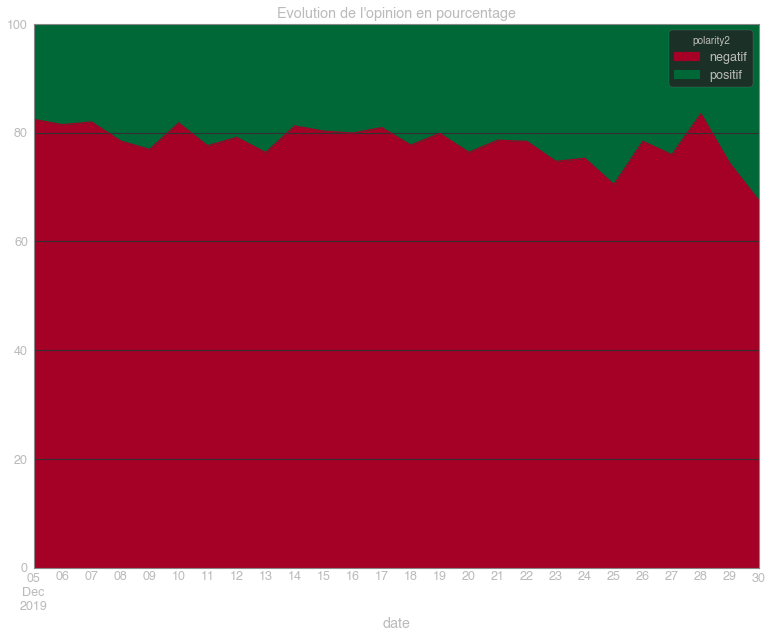

In [57]:
data = greve_twitter.groupby(["date","polarity2"]).size()#/data.polarity2.count()*100
data_perc = data.unstack()
data_perc = data_perc.divide(data_perc.sum(axis=1),axis=0)*100
ax = data_perc.plot.area(figsize=(13,10), colormap='RdYlGn',ylim=(0,100))
plt.title("Evolution de l'opinion en pourcentage")
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

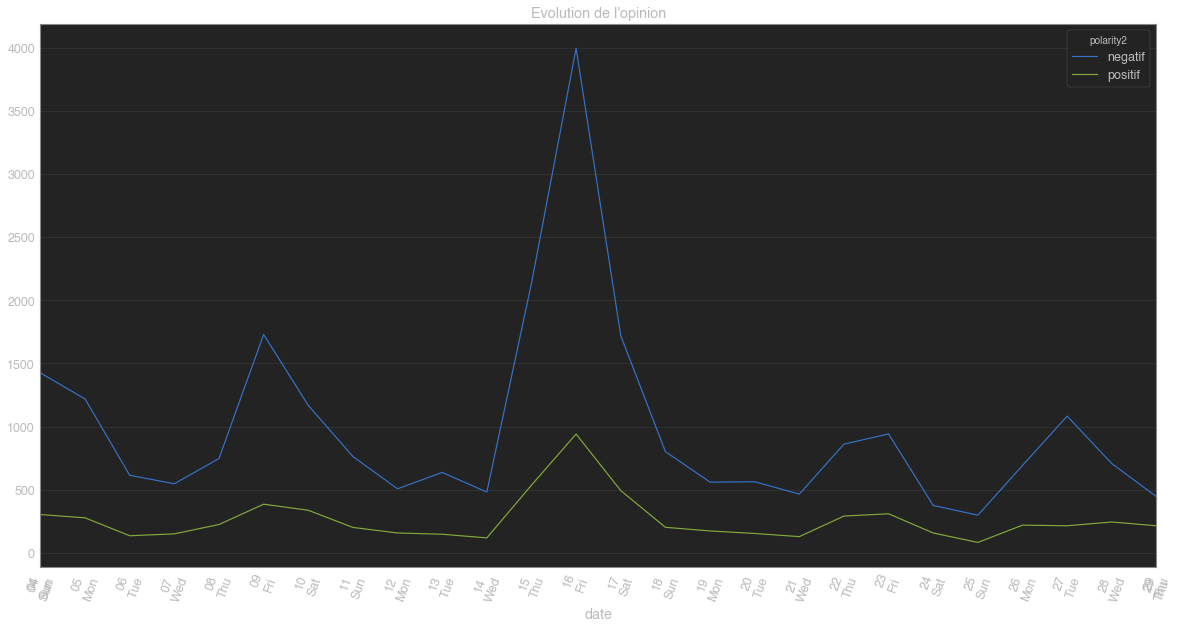

In [54]:
data = greve_twitter.groupby(["date","polarity2"]).size()
ax= data.unstack().plot(figsize=(20,10),rot=70)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%a'))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%d\n%a'))
plt.title("Evolution de l'opinion")
plt.show
#début grève 5/12, PM 'transitions progressives', manif 10/12,démission Delevoye 16/12, 
# manif 17/12 (3x plus de manif que le 10), 27/12 cap de la plus longue grève contre retraites (1995)

In [418]:
#séparation des dataframes en positif et negatif
greve_negatif = greve_twitter[greve_twitter.polarity=='negatif']
greve_positif = greve_twitter[greve_twitter.polarity=='positif']

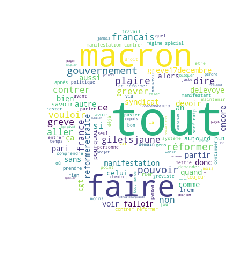

In [482]:
#df négatifs + wordcloud
text_negatif = ' '.join([x for x in greve_negatif.tweet_processed2])
sad_mask = np.array(Image.open("./sad.png"))
all_text= ' '.join([x for x in greve_twitter.tweet_processed2])
wordcloud = WordCloud(background_color='white',random_state=21,
                      max_font_size=110, width=1800,
                      height=1400,
                      stopwords=stopwords,mask=sad_mask).generate(text_negatif)
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('./sad_wordcloud.png', dpi=1200)
plt.show()

In [483]:
neg_word=greve_negatif.tweet_processed2.str.split(expand=True).stack().value_counts()
neg_word.head(10)

reformedesretraites    15109
retraiter               6346
macron                  2547
contrer                 2458
plaire                  2337
tout                    2314
faire                   2237
giletsjaunes            1861
réformer                1833
grevegenerale           1690
dtype: int64

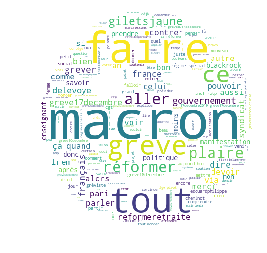

In [484]:
#df positifs + wordcloud
text_positif = ' '.join([x for x in greve_positif.tweet_processed2])
happy_mask = np.array(Image.open("./happy.png")) 
stopwords=['reformedesretraites','réformedesretraites','retraiter','grevegenerale']
all_text= ' '.join([x for x in greve_twitter.tweet_processed2])
wordcloud = WordCloud(background_color='white',random_state=21,
                      max_font_size=110,width=1800,
                      height=1400,
                      stopwords=stopwords,mask=happy_mask).generate(text_positif)
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('./happy_wordcloud.png', dpi=1200)
plt.show()

In [485]:
text_positifok = text_positif.split()

In [486]:
len(text_positifok)

202909

In [487]:
pos_word=greve_positif.tweet_processed2.str.split(expand=True).stack().value_counts()
pos_word.head(10)

reformedesretraites    14285
retraiter               3235
macron                  2151
giletsjaunes            1705
faire                   1682
tout                    1677
réformedesretraites     1418
grevegenerale           1402
greve                   1292
greve17decembre         1280
dtype: int64

In [488]:
import nltk
stopwords0=['réformedesretraites','retraiter','grevegenerale','reformedesretraites']

text_data=[]
text_data1=[]
text_data0 = greve_twitter['tweet_processed2'].tolist()
for x in text_data0:
    text_data1.append(nltk.word_tokenize(x))
for y in text_data1:
    y=[word for word in y if word not in stopwords0]
    text_data.append(y)

In [489]:
from gensim import corpora
dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(x) for x in text_data if x not in stopwords0]
import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')


In [490]:
import gensim
NUM_TOPICS = 5
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model5.gensim')
topics = ldamodel.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.048*"contrer" + 0.030*"manifestation" + 0.016*"mobilisation" + 0.014*"ruer" + 0.013*"manifestant" + 0.012*"pari" + 0.011*"cortège" + 0.009*"aujourd" + 0.009*"hui" + 0.009*"5decembre"')
(1, '0.019*"faire" + 0.017*"plaire" + 0.015*"tout" + 0.013*"aller" + 0.012*"ça" + 0.011*"ce" + 0.010*"réformer" + 0.010*"régime" + 0.009*"dire" + 0.009*"macron"')
(2, '0.044*"grevedu5decembre" + 0.043*"giletsjaunes" + 0.040*"macron" + 0.033*"greve5decembre" + 0.025*"greve17decembre" + 0.024*"reformeretraites" + 0.023*"sncf" + 0.022*"greve" + 0.020*"ratp" + 0.014*"5decembre2019"')
(3, '0.022*"grever" + 0.014*"greve10decembre" + 0.011*"lyon" + 0.010*"000" + 0.008*"delevoye" + 0.008*"contrer" + 0.008*"décembre" + 0.008*"cgt" + 0.007*"5decembre" + 0.007*"via"')
(4, '0.017*"tout" + 0.014*"an" + 0.011*"faire" + 0.009*"celui" + 0.009*"gouvernement" + 0.009*"réformer" + 0.008*"français" + 0.008*"ce" + 0.008*"pouvoir" + 0.008*"aller"')


In [500]:
d = {}
x=0
while x < len(topics):
    for topic[x] in topics:
        topic[x] = list(topic[x])
        topic[x] = "".join(map(str,topic[x]))
        topic[x] = topic[x].split('"')[1::2]
        x+=1
topic

[['contrer',
  'manifestation',
  'mobilisation',
  'ruer',
  'manifestant',
  'pari',
  'cortège',
  'aujourd',
  'hui',
  '5decembre'],
 ['faire',
  'plaire',
  'tout',
  'aller',
  'ça',
  'ce',
  'réformer',
  'régime',
  'dire',
  'macron'],
 ['grevedu5decembre',
  'giletsjaunes',
  'macron',
  'greve5decembre',
  'greve17decembre',
  'reformeretraites',
  'sncf',
  'greve',
  'ratp',
  '5decembre2019'],
 ['grever',
  'greve10decembre',
  'lyon',
  '000',
  'delevoye',
  'contrer',
  'décembre',
  'cgt',
  '5decembre',
  'via'],
 ['tout',
  'an',
  'faire',
  'celui',
  'gouvernement',
  'réformer',
  'français',
  'ce',
  'pouvoir',
  'aller'],
 'réformer',
 'français',
 'ce',
 'pouvoir',
 'aller']

In [502]:
df_topic1 = pd.DataFrame(topic[1], columns=['words'])
df_topic2 = pd.DataFrame(topic[2], columns=['words'])
df_topic3 = pd.DataFrame(topic[3], columns=['words'])
df_topic4 = pd.DataFrame(topic[4], columns=['words'])
df_topic5 = pd.DataFrame(topic[0], columns=['words'])

In [503]:
df_topic1

,words
0,faire
1,plaire
2,tout
3,aller
4,ça
5,ce
6,réformer
7,régime
8,dire
9,macron


In [504]:
df_topic2

,words
0,grevedu5decembre
1,giletsjaunes
2,macron
3,greve5decembre
4,greve17decembre
5,reformeretraites
6,sncf
7,greve
8,ratp
9,5decembre2019


In [505]:
df_topic3

,words
0,grever
1,greve10decembre
2,lyon
3,000
4,delevoye
5,contrer
6,décembre
7,cgt
8,5decembre
9,via


In [506]:
df_topic4

,words
0,tout
1,an
2,faire
3,celui
4,gouvernement
5,réformer
6,français
7,ce
8,pouvoir
9,aller


In [507]:
df_topic5

,words
0,contrer
1,manifestation
2,mobilisation
3,ruer
4,manifestant
5,pari
6,cortège
7,aujourd
8,hui
9,5decembre


In [508]:
import os
java_path = "C:\\Program Files (x86)\\Java\\jre1.8.0_231\\bin\\java.exe"
os.environ['JAVAHOME'] = java_path
from nltk.tag.stanford import StanfordPOSTagger
path_to_model = "./stanford-postagger-full-2018-10-16/models/french.tagger"
path_to_jar = "./stanford-postagger-full-2018-10-16/stanford-postagger.jar"
tagger=StanfordPOSTagger(path_to_model, path_to_jar)

print(tagger.tag(sentence.split()))

LookupError: Could not find stanford-postagger.jar jar file at ./stanford-postagger-full-2018-10-16/stanford-postagger.jar

In [252]:
adj_pos1 = [word for word, tags in tagger.tag(text_positif.split()[0:6999]) if tags==('ADJ')] 

In [254]:
adj_pos2 = [word for word, tags in tagger.tag(text_positif.split()[7000:13999]) if tags==('ADJ')] 

In [256]:
adj_pos3 = [word for word, tags in tagger.tag(text_positif.split()[15000:20999]) if tags==('ADJ')] 

In [257]:
adj_pos4 = [word for word, tags in tagger.tag(text_positif.split()[22000:27999]) if tags==('ADJ')] 

In [260]:
adj_pos5 = [word for word, tags in tagger.tag(text_positif.split()[28000:32999]) if tags==('ADJ')] 

In [261]:
adj_pos6 = [word for word, tags in tagger.tag(text_positif.split()[35000:40999]) if tags==('ADJ')] 

In [262]:
adj_pos7 = [word for word, tags in tagger.tag(text_positif.split()[42000:47999]) if tags==('ADJ')] 

In [263]:
adj_pos8 = [word for word, tags in tagger.tag(text_positif.split()[48000:53999]) if tags==('ADJ')] 

In [264]:
adj_pos9 = [word for word, tags in tagger.tag(text_positif.split()[55000:59999]) if tags==('ADJ')] 

In [265]:
adj_pos10 = [word for word, tags in tagger.tag(text_positif.split()[60000:64999]) if tags==('ADJ')] 

In [266]:
adj_pos11 = [word for word, tags in tagger.tag(text_positif.split()[65000:69999]) if tags==('ADJ')] 

In [267]:
adj_pos12 = [word for word, tags in tagger.tag(text_positif.split()[70000:74999]) if tags==('ADJ')] 

In [268]:
adj_pos13 = [word for word, tags in tagger.tag(text_positif.split()[75000:79999]) if tags==('ADJ')] 

In [269]:
adj_pos14 = [word for word, tags in tagger.tag(text_positif.split()[80000:84999]) if tags==('ADJ')] 

In [270]:
adj_pos15 = [word for word, tags in tagger.tag(text_positif.split()[85000:89999]) if tags==('ADJ')] 

In [271]:
adj_pos16 = [word for word, tags in tagger.tag(text_positif.split()[90000:94999]) if tags==('ADJ')] 

In [272]:
adj_pos17 = [word for word, tags in tagger.tag(text_positif.split()[95000:99999]) if tags==('ADJ')] 

In [273]:
adj_pos18 = [word for word, tags in tagger.tag(text_positif.split()[100000:104999]) if tags==('ADJ')] 

In [274]:
adj_pos19 = [word for word, tags in tagger.tag(text_positif.split()[105000:109999]) if tags==('ADJ')] 

In [275]:
adj_pos20 = [word for word, tags in tagger.tag(text_positif.split()[110000:114999]) if tags==('ADJ')] 

In [276]:
adj_pos21 = [word for word, tags in tagger.tag(text_positif.split()[115000:119999]) if tags==('ADJ')] 

In [277]:
adj_pos22 = [word for word, tags in tagger.tag(text_positif.split()[120000:124999]) if tags==('ADJ')] 

In [278]:
adj_pos23 = [word for word, tags in tagger.tag(text_positif.split()[125000:129999]) if tags==('ADJ')] 

In [279]:
adj_pos24 = [word for word, tags in tagger.tag(text_positif.split()[130000:134999]) if tags==('ADJ')] 

In [280]:
adj_pos25 = [word for word, tags in tagger.tag(text_positif.split()[160000:165999]) if tags==('ADJ')] 

In [281]:
adj_pos26 = [word for word, tags in tagger.tag(text_positif.split()[167000:171999]) if tags==('ADJ')] 

In [282]:
adj_pos27 = [word for word, tags in tagger.tag(text_positif.split()[173000:177999]) if tags==('ADJ')] 

In [287]:
adj_pos28 = [word for word, tags in tagger.tag(text_positif.split()[198000:-1]) if tags==('ADJ')] 

In [304]:
adj_pos = adj_pos1+adj_pos2+adj_pos3+adj_pos4+adj_pos5+adj_pos6+adj_pos7+adj_pos8+adj_pos9+adj_pos10+adj_pos11+adj_pos12+adj_pos13+adj_pos14+adj_pos15+adj_pos16+adj_pos17+adj_pos18+adj_pos19+adj_pos20+adj_pos21+adj_pos22+adj_pos23+adj_pos24+adj_pos25+adj_pos26+adj_pos27+adj_pos28


In [305]:
stopwords=['reformedesretraites','réformedesretraites','retraiter','grevegenerale','giletsjaunes','greve17decembre','17decembre2019','noël','ratp','greve','macron','autre','delevoye','grevedu17decembre','tout']

In [306]:
for word in adj_pos:
    if word in stopwords:
        adj_pos.remove(word)

In [307]:
import nltk
df=pd.DataFrame.from_dict(nltk.FreqDist(adj_pos),orient='index')
df = df.sort_values(by=0, ascending=False).reset_index()
df.columns=['mot','freq']
df.head(10)

,mot,freq
0,français,487
1,bon,479
2,reformedesretraites,383
3,grand,331
4,social,314
5,gréviste,274
6,france,258
7,nouveau,247
8,petit,238
9,grevegenerale,230


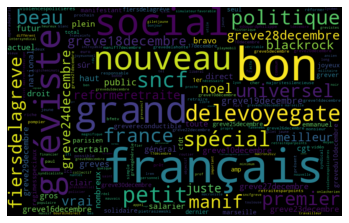

In [309]:
adj_pos = ' '.join(adj_pos)
wordcloud = WordCloud(width=800, height=500, random_state=21,max_font_size=110,stopwords=stopwords).generate(adj_pos)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.savefig('greve_pos_mots.png')